In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import geopy.distance
# import Gpy


In [4]:
qdata = pd.read_csv('cleaned-qdata.csv')
qdata

,well,X_UTM,Y_UTM,Q_lpm
0,BalajuPark Well,332622.4245,3068903.385,600.0
1,Bansbari Bhaktapur Well,347876.3542,3063728.237,400.0
2,Bode solar tube well,341850.6854,3064433.453,600.0
3,Bode Treatment Plant,341610.7512,3064641.583,600.0
4,Bode Tubewell Dugwell Compound,341852.2304,3065309.970,500.0
...,...,...,...,...
79,Sitapaila well,330476.6749,3066710.112,200.0
80,Suichataar well,330309.6899,3064993.617,350.0
81,Sukedhara well,337060.4114,3068666.772,400.0
82,Swayombhu Geeta Mandir,330923.4266,3066921.091,250.0


### Visualization of the original data:

In [46]:
x = qdata.iloc[:,1]
y = qdata.iloc[:, 2]
q = qdata.iloc[:,3]


#### Plot between x and Q(lpm)

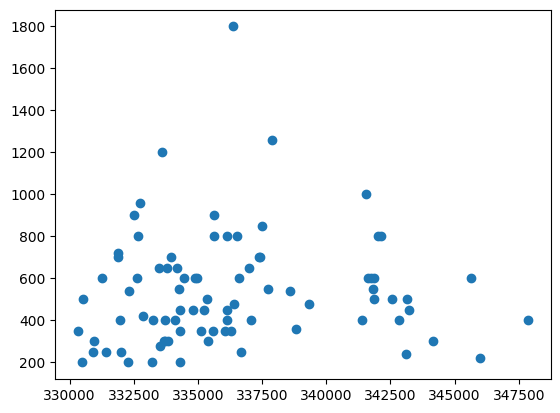

In [47]:
plt.scatter(x,q)

#### Plot between y and Q(lpm)

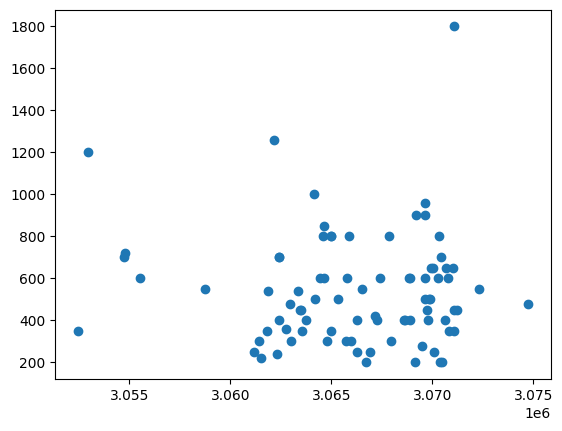

In [49]:
plt.scatter(y,q)

#### Scatter Plot of Discharge Data (Colorbar indicates discharge in lpm)

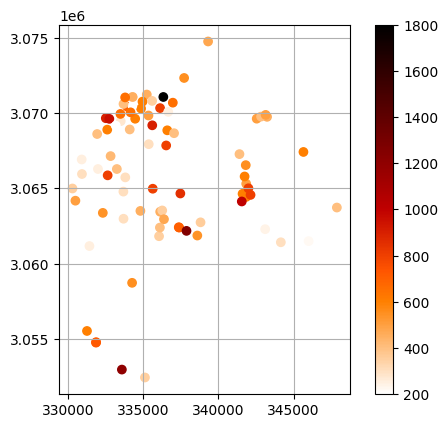

In [65]:
plt.gca().set_aspect('equal')
plt.grid()
plt.scatter(x, y, c=q, cmap='gist_heat_r')
plt.colorbar()

#### Triangulated Contour Filled Plot

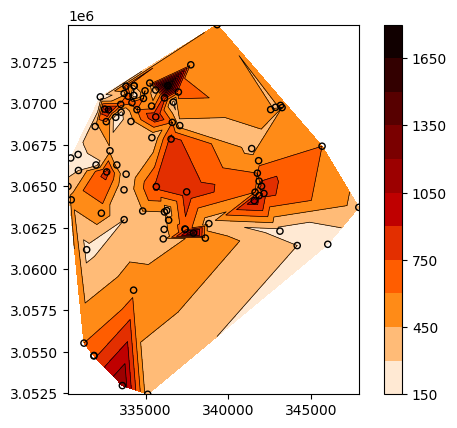

In [85]:
z = q
# create plot
fig, ax = plt.subplots(nrows=1)

# contoure
ax.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k') 
# filling
cntr2 = ax.tricontourf(x, y, z, levels=14, cmap="gist_heat_r") 
# colorbar
fig.colorbar(cntr2, ax=ax)
# dots
ax.scatter(x, y,s = 20, facecolors='none', edgecolor='k') 
 
# Equal aspect ratio 
plt.gca().set_aspect('equal', adjustable='box')
# plt.clim(0.13,0.4) 
plt.show()

### Gaussian Regression Implementation

Define the positions at wich the function values shall be predicted

In [91]:
xPred=np.arange(330000,350000,100)
yPred = np.arange(3053500, 1000)


In [96]:
c2=0.25 # constant coefficient of quadratic term in prior mean function
ell=10000 # horizontal length scale parameter in the squared exponential function
sigmaF2=2 #sigmaF2 is the variance of the multivariate gaussian distribution
sigmaN2=0.005 #sigmaN2 is the variance of the regression noise-term